In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
end = dt.datetime.today()
start = dt.datetime(end.year - 10, end.month, end.day)

In [3]:
df = yf.download("^GSPC", start, end)['Adj Close'].to_frame()
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2011-05-31,1345.199951
2011-06-01,1314.550049
2011-06-02,1312.939941
2011-06-03,1300.160034
2011-06-06,1286.170044


Text(0, 0.5, 'Price ($)')

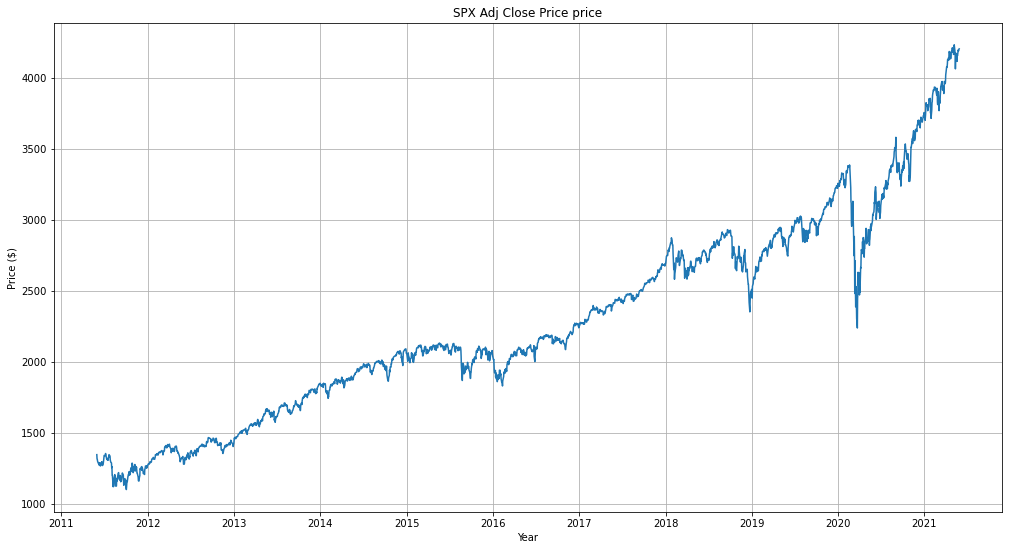

In [9]:
plt.figure(figsize = (17,9))
plt.plot(df)
plt.title("SPX Adj Close Price price")
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Price ($)")

In [11]:
#now they are going to make a moving average
df['30ma'] = df['Adj Close'].rolling(window = 30).mean()
df.head()

,Adj Close,30ma
Date,,
2011-05-31,1345.199951,NaN
2011-06-01,1314.550049,NaN
2011-06-02,1312.939941,NaN
2011-06-03,1300.160034,NaN
2011-06-06,1286.170044,NaN


Text(0, 0.5, 'Price ($)')

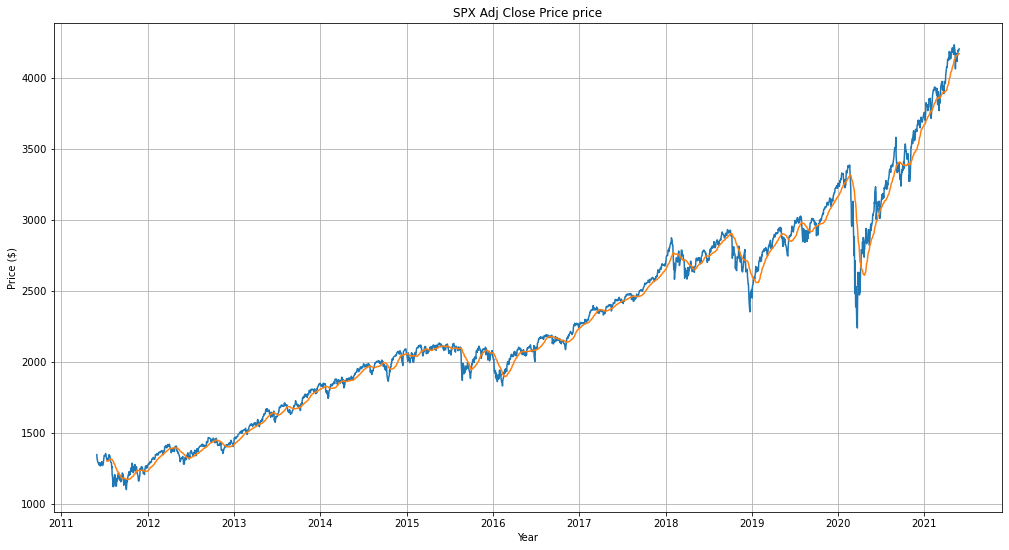

In [22]:
plt.figure(figsize = (17,9))
plt.plot(df, label = 'Actual')
plt.title("SPX Adj Close Price price")
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Price ($)")

In [31]:
df_exp = df['Adj Close'].to_frame()

In [32]:
def exponential_smoothing(series,alpha):
    
    result=[series[0]] # first value is same as in series
    for n in range(1,len(series)):
        result.append(alpha * series[n] + (1-alpha) * result[n-1])
        
    return result

def plot_exponential_smoothing(series,alphas):
    
    plt.figure(figsize=(17,8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series,alpha),label='Alpha {}'.format(alpha))
    plt.plot(series.values,'c',label='Actual')
    plt.legend()
    plt.title('Exponential Smoothing')
    plt.grid(True)

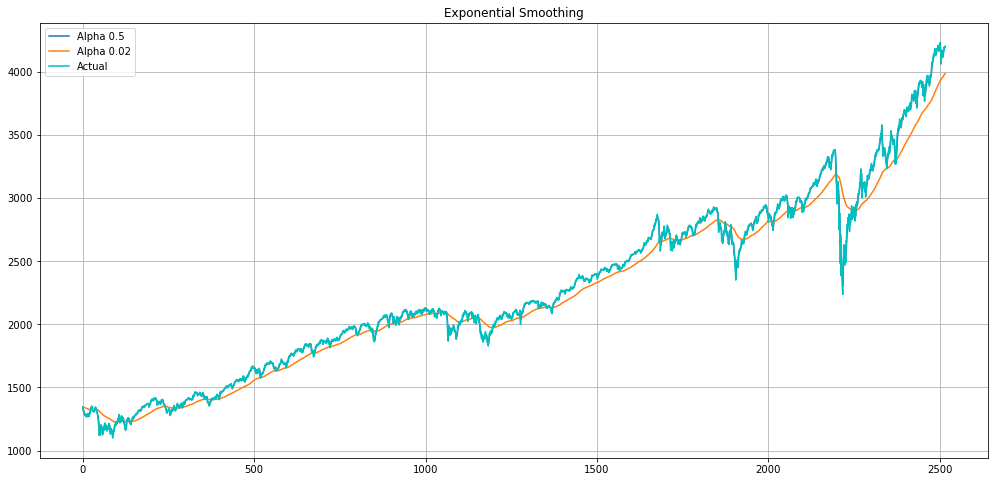

In [34]:
plot_exponential_smoothing(df['Adj Close'],[0.5,0.02])

Now run the augmented dickey fuller

In [39]:
#we can use the statsmodel method
from statsmodels.tsa.stattools import adfuller
test_results = adfuller(df['Adj Close'])
print(test_result)

(1.1849891901443241, 0.9958805140331005, 27, 2489, {'1%': -3.4329799947351503, '5%': -2.862701915447137, '10%': -2.5673885329713495}, 23181.655531498094)


In [40]:
#or you can make this test
def adfuller_test(series):
    
    #print the adf statistics
    print("ADF Statistics:", test_result[0])
    print("p-value:", test_result[1])
    print("critical values:")
    
    for key, value in test_results[4].items():
        
        print("{}".format(key), "{}".format(value))
        
    if test_result[0] < test_result[4]["5%"]:
        print("Data has not unit root and is stationary")
    
    else:
        print("Data has unit root and is notstationary")

In [41]:
adfuller_test(df['Adj Close'])

ADF Statistics: 1.1849891901443241
p-value: 0.9958805140331005
critical values:
1% -3.4329799947351503
5% -2.862701915447137
10% -2.5673885329713495
Data has unit root and is notstationary


In [43]:
#now they are going to make ACF and PACF toosl
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

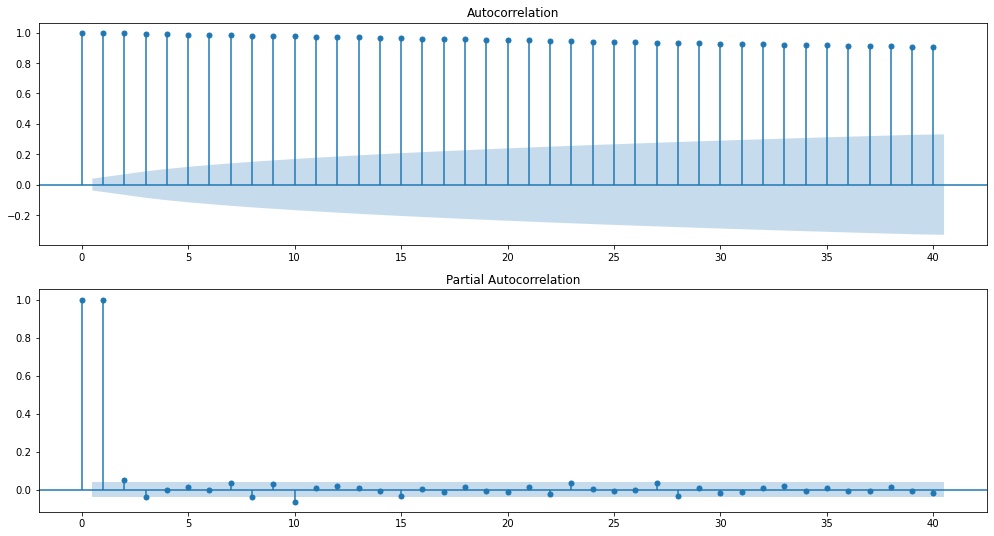

In [44]:
fig = plt.figure(figsize = (17,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Adj Close'], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Adj Close'], lags = 40, ax = ax2)